# Comparing Machine Learning Techniques to predict Bottom Hole Pressure in Volve wells

In [33]:
import pandas as pd
import seaborn as sns
from ipywidgets import interact
import matplotlib.pyplot as plt

In [3]:
fileurl = "https://github.com/orkahub/PEG_Python/raw/master/Data/Volve/Production_data/Volve%20production%20data.xlsx"
df_prod = pd.read_excel(fileurl)

In [5]:
df_prod.sample(5)

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
12125,2016-03-21,NO 15/9-F-4 AH,5693,15/9-F-4,3420717,VOLVE,369304,MÆRSK INSPIRER,24.0,NaN,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,4547.0,injection,WI
4827,2016-05-01,NO 15/9-F-12 H,5599,15/9-F-12,3420717,VOLVE,369304,MÆRSK INSPIRER,24.0,0.000000,...,%,26.513668,77.413469,0.858489,193.89,31273.22,1163.49,NaN,production,OP
127,2014-08-12,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,24.0,215.505587,...,%,37.094039,44.267469,8.481567,287.03,44830.19,240.33,NaN,production,OP
6135,2011-05-10,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,MÆRSK INSPIRER,24.0,246.468147,...,%,40.702692,89.014316,10.651889,1686.76,264022.34,4139.85,NaN,production,OP
5728,2010-03-22,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,MÆRSK INSPIRER,24.0,238.618044,...,%,54.875394,88.508218,21.618523,2650.03,370156.14,2364.90,NaN,production,OP


In [8]:
list(df_prod.columns)

['DATEPRD',
 'WELL_BORE_CODE',
 'NPD_WELL_BORE_CODE',
 'NPD_WELL_BORE_NAME',
 'NPD_FIELD_CODE',
 'NPD_FIELD_NAME',
 'NPD_FACILITY_CODE',
 'NPD_FACILITY_NAME',
 'ON_STREAM_HRS',
 'AVG_DOWNHOLE_PRESSURE',
 'AVG_DOWNHOLE_TEMPERATURE',
 'AVG_DP_TUBING',
 'AVG_ANNULUS_PRESS',
 'AVG_CHOKE_SIZE_P',
 'AVG_CHOKE_UOM',
 'AVG_WHP_P',
 'AVG_WHT_P',
 'DP_CHOKE_SIZE',
 'BORE_OIL_VOL',
 'BORE_GAS_VOL',
 'BORE_WAT_VOL',
 'BORE_WI_VOL',
 'FLOW_KIND',
 'WELL_TYPE']

In [9]:
df_prod['AVG_CHOKE_UOM']

0          %
1          %
2          %
3          %
4          %
        ... 
15629      %
15630      %
15631      %
15632      %
15633    NaN
Name: AVG_CHOKE_UOM, Length: 15634, dtype: object

In [11]:
df_prod[['AVG_CHOKE_UOM', 'AVG_CHOKE_SIZE_P', 'DP_CHOKE_SIZE']].head(5)

,AVG_CHOKE_UOM,AVG_CHOKE_SIZE_P,DP_CHOKE_SIZE
0,%,0.000000,0.00000
1,%,1.003059,0.00000
2,%,0.979008,0.00000
3,%,0.545759,0.00000
4,%,1.215987,33.07195


In [12]:
column_names = {
    'DATEPRD': 'dates',
    'WELL_BORE_CODE': 'well_id',
    'NPD_WELL_BORE_CODE': 'well_name_code',
    'NPD_WELL_BORE_NAME': 'well_name',
    'NPD_FIELD_CODE': 'field_code',
    'NPD_FIELD_NAME': 'field_name',
    'NPD_FACILITY_CODE': 'facility_code',
    'NPD_FACILITY_NAME': 'facility_name',
    'ON_STREAM_HRS': 'on_stream_hours',
    'AVG_DOWNHOLE_PRESSURE': 'bhp',
    'AVG_DOWNHOLE_TEMPERATURE': 'bht',
    'AVG_DP_TUBING': 'dp_tubing',
    'AVG_ANNULUS_PRESS': 'casing_pressure',
    'AVG_CHOKE_SIZE_P': 'choke_size',
    'AVG_CHOKE_UOM': 'choke_units',
    'AVG_WHP_P': 'tht',
    'AVG_WHT_P': 'thp',
    'DP_CHOKE_SIZE': 'choke_size_percentage',
    'BORE_OIL_VOL': 'oil_vol',
    'BORE_GAS_VOL': 'gas_vol',
    'BORE_WAT_VOL': 'water_vol',
    'BORE_WI_VOL': 'water_inj',
    'FLOW_KIND': 'flow_kind',
    'WELL_TYPE': 'well_type'
}

In [13]:
df_prod.rename(columns=column_names, inplace=True)

In [14]:
df_prod.head(5)

,dates,well_id,well_name_code,well_name,field_code,field_name,facility_code,facility_name,on_stream_hours,bhp,...,choke_units,tht,thp,choke_size_percentage,oil_vol,gas_vol,water_vol,water_inj,flow_kind,well_type
0,2014-04-07,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.00000,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,WI
1,2014-04-08,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
2,2014-04-09,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
3,2014-04-10,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
4,2014-04-11,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,310.37614,...,%,33.09788,10.47992,33.07195,0.0,0.0,0.0,NaN,production,OP


In [15]:
df_prod['well_type']

0        WI
1        OP
2        OP
3        OP
4        OP
         ..
15629    OP
15630    OP
15631    OP
15632    OP
15633    WI
Name: well_type, Length: 15634, dtype: object

In [17]:
df_prod = df_prod[df_prod['well_type']=='OP']

In [19]:
df_prod.shape

(9143, 24)

## Data Preparation

In [48]:
# Let's drop some columns
first_set_to_drop = ['well_id', 'on_stream_hours', 'casing_pressure', 'well_name_code', 
                   'field_code', 'field_name', 'facility_code', 'facility_name', 'choke_units', 
                   'choke_size', 'flow_kind', 'well_type', 'water_inj']
df = df_prod.drop(first_set_to_drop, axis=1)

In [21]:
df.head()

,dates,well_name,bhp,bht,dp_tubing,tht,thp,choke_size_percentage,oil_vol,gas_vol,water_vol
1,2014-04-08,15/9-F-1 C,NaN,NaN,NaN,0.00000,0.00000,0.00000,0.0,0.0,0.0
2,2014-04-09,15/9-F-1 C,NaN,NaN,NaN,0.00000,0.00000,0.00000,0.0,0.0,0.0
3,2014-04-10,15/9-F-1 C,NaN,NaN,NaN,0.00000,0.00000,0.00000,0.0,0.0,0.0
4,2014-04-11,15/9-F-1 C,310.37614,96.87589,277.27826,33.09788,10.47992,33.07195,0.0,0.0,0.0
5,2014-04-12,15/9-F-1 C,303.50078,96.92339,281.44744,22.05334,8.70429,22.05334,0.0,0.0,0.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9143 entries, 1 to 15632
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   dates                  9143 non-null   datetime64[ns]
 1   well_name              9143 non-null   object        
 2   bhp                    8978 non-null   float64       
 3   bht                    8978 non-null   float64       
 4   dp_tubing              8978 non-null   float64       
 5   tht                    9137 non-null   float64       
 6   thp                    9129 non-null   float64       
 7   choke_size_percentage  9137 non-null   float64       
 8   oil_vol                9143 non-null   float64       
 9   gas_vol                9143 non-null   float64       
 10  water_vol              9143 non-null   float64       
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 857.2+ KB


In [23]:
df.isnull().sum()

dates                      0
well_name                  0
bhp                      165
bht                      165
dp_tubing                165
tht                        6
thp                       14
choke_size_percentage      6
oil_vol                    0
gas_vol                    0
water_vol                  0
dtype: int64

In [24]:
df[df['bhp'].isnull()]

,dates,well_name,bhp,bht,dp_tubing,tht,thp,choke_size_percentage,oil_vol,gas_vol,water_vol
1,2014-04-08,15/9-F-1 C,NaN,NaN,NaN,0.00000,0.00000,0.00000,0.0,0.0,0.0
2,2014-04-09,15/9-F-1 C,NaN,NaN,NaN,0.00000,0.00000,0.00000,0.0,0.0,0.0
3,2014-04-10,15/9-F-1 C,NaN,NaN,NaN,0.00000,0.00000,0.00000,0.0,0.0,0.0
748,2013-07-10,15/9-F-11,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
750,2013-07-12,15/9-F-11,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
15628,2016-09-13,15/9-F-5,NaN,NaN,NaN,0.08545,0.22889,0.03741,0.0,0.0,0.0
15629,2016-09-14,15/9-F-5,NaN,NaN,NaN,0.07776,0.22879,0.01862,0.0,0.0,0.0
15630,2016-09-15,15/9-F-5,NaN,NaN,NaN,0.08545,0.22914,0.00631,0.0,0.0,0.0
15631,2016-09-16,15/9-F-5,NaN,NaN,NaN,0.08544,0.22896,0.01181,0.0,0.0,0.0


In [25]:
df.dropna(inplace=True)

In [26]:
df.isnull().sum()

dates                    0
well_name                0
bhp                      0
bht                      0
dp_tubing                0
tht                      0
thp                      0
choke_size_percentage    0
oil_vol                  0
gas_vol                  0
water_vol                0
dtype: int64

In [27]:
wellnames = df['well_name'].unique()
wellnames

array(['15/9-F-1 C', '15/9-F-11', '15/9-F-12', '15/9-F-14', '15/9-F-15 D'],
      dtype=object)

In [28]:
df.head()

,dates,well_name,bhp,bht,dp_tubing,tht,thp,choke_size_percentage,oil_vol,gas_vol,water_vol
4,2014-04-11,15/9-F-1 C,310.37614,96.87589,277.27826,33.09788,10.47992,33.07195,0.0,0.0,0.0
5,2014-04-12,15/9-F-1 C,303.50078,96.92339,281.44744,22.05334,8.70429,22.05334,0.0,0.0,0.0
6,2014-04-13,15/9-F-1 C,303.53481,96.95885,276.03200,27.50281,9.42315,16.16326,0.0,0.0,0.0
7,2014-04-14,15/9-F-1 C,303.78228,96.96873,282.78676,20.99552,8.13137,20.73712,0.0,0.0,0.0
8,2014-04-15,15/9-F-1 C,303.85821,97.02136,289.94067,13.91754,8.49833,12.18153,0.0,0.0,0.0


In [29]:
df.shape

(8978, 11)

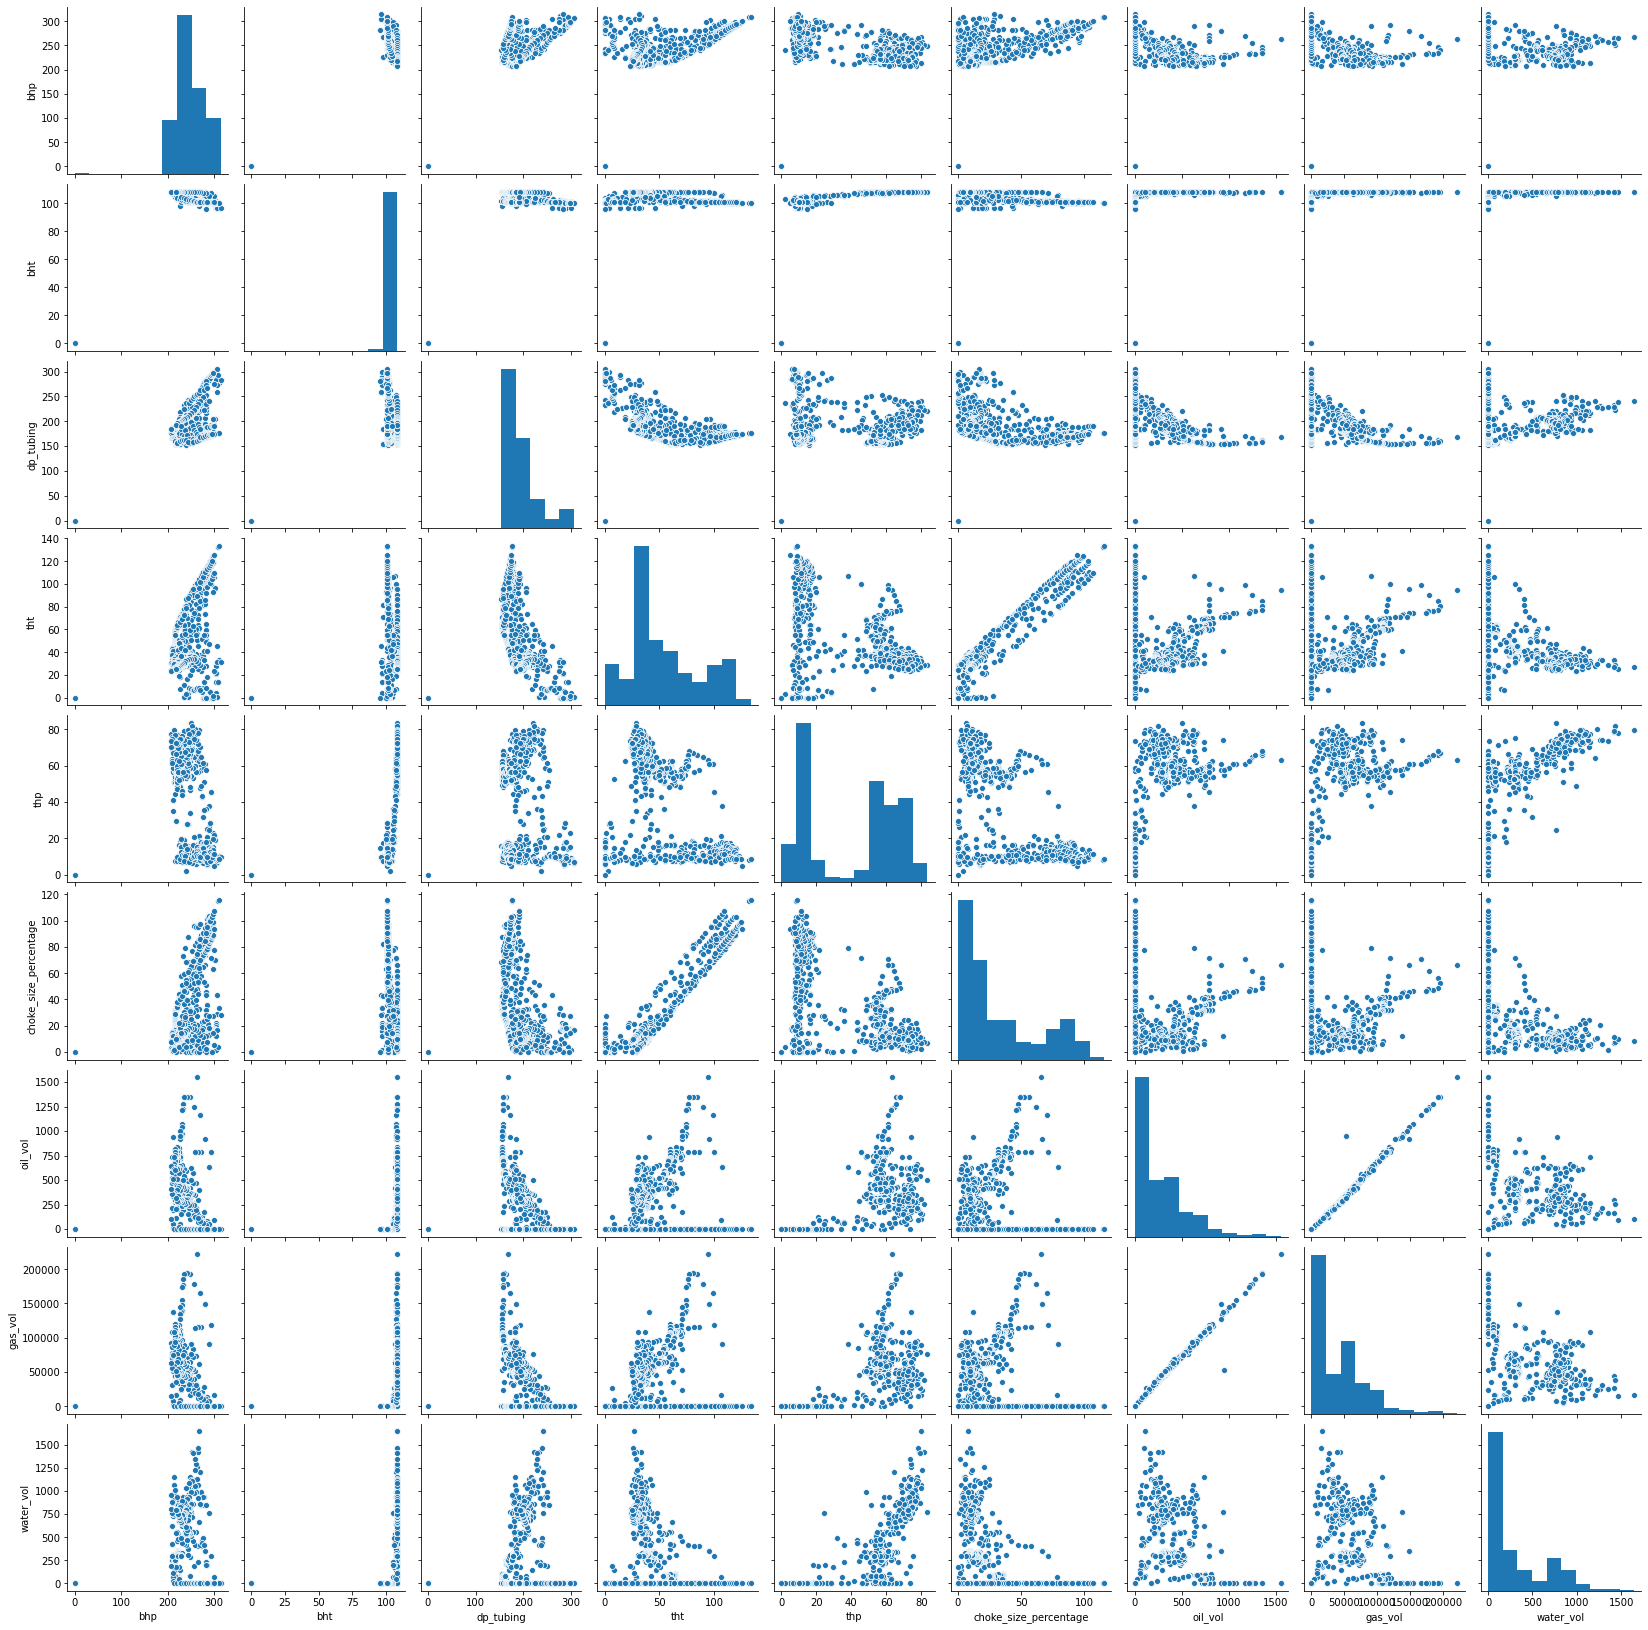

In [31]:
sns.pairplot(df[df['well_name']==wellnames[0]])

In [37]:
df.describe()

,bhp,bht,dp_tubing,tht,thp,choke_size_percentage,oil_vol,gas_vol,water_vol
count,8978.000000,8978.000000,8978.000000,8978.000000,8978.000000,8978.000000,8978.000000,8978.000000,8978.000000
mean,181.820413,77.168114,154.045010,45.774803,68.160861,19.454990,1107.055257,162684.259871,1704.698507
std,109.707241,45.654600,76.743653,24.686681,27.665425,22.613863,1325.247814,188338.136972,1708.823188
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-457.840000
25%,0.000000,0.000000,84.163947,31.420656,58.966528,3.480090,190.447500,29391.745000,20.875000
50%,232.927076,103.186689,175.603884,38.303616,80.303883,9.881511,573.205000,89586.655000,1160.085000
75%,255.405756,106.276408,204.335726,57.598695,88.118935,27.292412,1374.610000,207549.382500,3288.062500
max,397.588550,108.502178,345.906770,137.311030,93.509584,125.718570,5888.690000,835981.330000,8019.740000


In [41]:
@interact
def boxdistplot(well= wellnames):
    df_temp = df[df['well_name']==well]
    df_temp = df_temp.drop(['dates', 'well_name'], axis=1)
    f, axes = plt.subplots(len(df_temp.columns), 2, figsize=(20,40))
    for i, colname in enumerate(df_temp.columns):
        sns.boxplot(df_temp[colname], ax = axes[i,1])
        sns.distplot(df_temp[colname], ax = axes[i,0])

interactive(children=(Dropdown(description='well', options=('15/9-F-1 C', '15/9-F-11', '15/9-F-12', '15/9-F-14…

In [57]:
@interact
def thispairplot(well=wellnames, plot_variable = ['bhp', 'choke_size_percentage', 'bht', 'casing_pressure']):
    fig, ax = plt.subplots(figsize=(20,8))
    #plt.figure(figsize=(20,8))
    df_temp = df[df['well_name']==well]
    ax.scatter(df_temp['dates'], df_temp[plot_variable])
    ax.set_ylabel(plot_variable)
    ax2 = ax.twinx()
    ax2.scatter(df_temp['dates'], df_temp['oil_vol'], marker = 'x', color = 'black')
    ax2.set_ylabel('oil_vol')

interactive(children=(Dropdown(description='well', options=('15/9-F-1 C', '15/9-F-11', '15/9-F-12', '15/9-F-14…

In [49]:
# We still need to do more data cleaning
# My model will be predictive only while the well is open
df = df[(df['oil_vol']>0)& (df['bhp']>0)]

In [50]:
df.shape

(5940, 11)

## Feature Engineering

In [51]:
df['gor'] =df['gas_vol']/df['oil_vol']
df['wc'] = df['water_vol']/(df['water_vol']+df['oil_vol'])

In [52]:
df = df.drop(['gas_vol', 'water_vol'], axis=1)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5940 entries, 15 to 8927
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   dates                  5940 non-null   datetime64[ns]
 1   well_name              5940 non-null   object        
 2   bhp                    5940 non-null   float64       
 3   bht                    5940 non-null   float64       
 4   dp_tubing              5940 non-null   float64       
 5   tht                    5940 non-null   float64       
 6   thp                    5940 non-null   float64       
 7   choke_size_percentage  5940 non-null   float64       
 8   oil_vol                5940 non-null   float64       
 9   gor                    5940 non-null   float64       
 10  wc                     5940 non-null   float64       
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 556.9+ KB


In [56]:
wells_to_fit = wellnames[:2]
wells_to_fit

array(['15/9-F-1 C', '15/9-F-11'], dtype=object)

In [58]:
df_trainingwells = df[df['well_name'].isin(wells_to_fit)]

In [59]:
predictors = ['dp_tubing', 'tht', 'thp', 'choke_size_percentage', 'oil_vol', 'gor', 'wc']


## ML data input

In [60]:
X = df_trainingwells[predictors]
y = df_trainingwells['bhp']

In [62]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1547 entries, 15 to 1910
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dp_tubing              1547 non-null   float64
 1   tht                    1547 non-null   float64
 2   thp                    1547 non-null   float64
 3   choke_size_percentage  1547 non-null   float64
 4   oil_vol                1547 non-null   float64
 5   gor                    1547 non-null   float64
 6   wc                     1547 non-null   float64
dtypes: float64(7)
memory usage: 96.7 KB


In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [71]:
X_train.head(5)

,dp_tubing,tht,thp,choke_size_percentage,oil_vol,gor,wc
1794,222.078730,28.293593,82.274826,2.772034,487.50,159.332574,0.828624
960,171.805049,69.918145,59.365076,41.699860,117.82,160.354524,0.107695
1868,226.150538,26.455152,83.633735,2.809604,422.88,159.361119,0.856571
1330,163.852049,44.622561,64.263978,16.516800,969.44,151.662929,0.361698
1662,198.673272,32.906630,80.175531,6.146725,975.22,159.475441,0.690645


In [83]:
y_train.head(5)

1794    250.372323
960     241.723194
1868    252.605690
1330    208.474610
1662    231.579902
Name: bhp, dtype: float64

In [72]:
X_train.shape

(1237, 7)

In [74]:
X_test.shape

(310, 7)

In [89]:
y_test.head()

877     254.939874
441     238.532560
670     282.771012
1065    225.100629
353     223.934706
Name: bhp, dtype: float64

In [78]:
# Importing ML models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [79]:
# Importing preprocessing functionalities
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [84]:
# Importing metrics
from sklearn.metrics import mean_squared_error

In [85]:
pipemodel = Pipeline([
    ('scl', StandardScaler()),
    ('reg', LinearRegression())
])

In [86]:
pipemodel.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [90]:
bhp_pred_lm_test = pipemodel.predict(X_test)
bhp_pred_lm_train = pipemodel.predict(X_train)

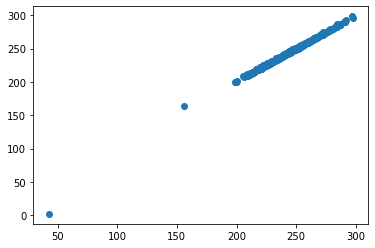

In [91]:
plt.scatter(bhp_pred_lm_train, y_train)

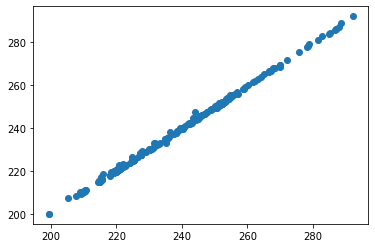

In [92]:
plt.scatter(bhp_pred_lm_test, y_test)

In [93]:
print(f'Training accuracy {pipemodel.score(X_train, y_train)}')

Training accuracy 0.9956085208282329


In [96]:
print(f'Test accuracy {pipemodel.score(X_test, y_test)}')

Test accuracy 0.9990313337672282


In [107]:
df_prod2 = df_prod[(df_prod['oil_vol']>0)& (df_prod['bhp']>0)]

In [110]:
df_prod2['gor'] =df_prod2['gas_vol']/df_prod2['oil_vol']
df_prod2['wc'] = df_prod2['water_vol']/(df_prod2['water_vol']+df_prod2['oil_vol'])

c:\users\prime\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\prime\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


c:\users\prime\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


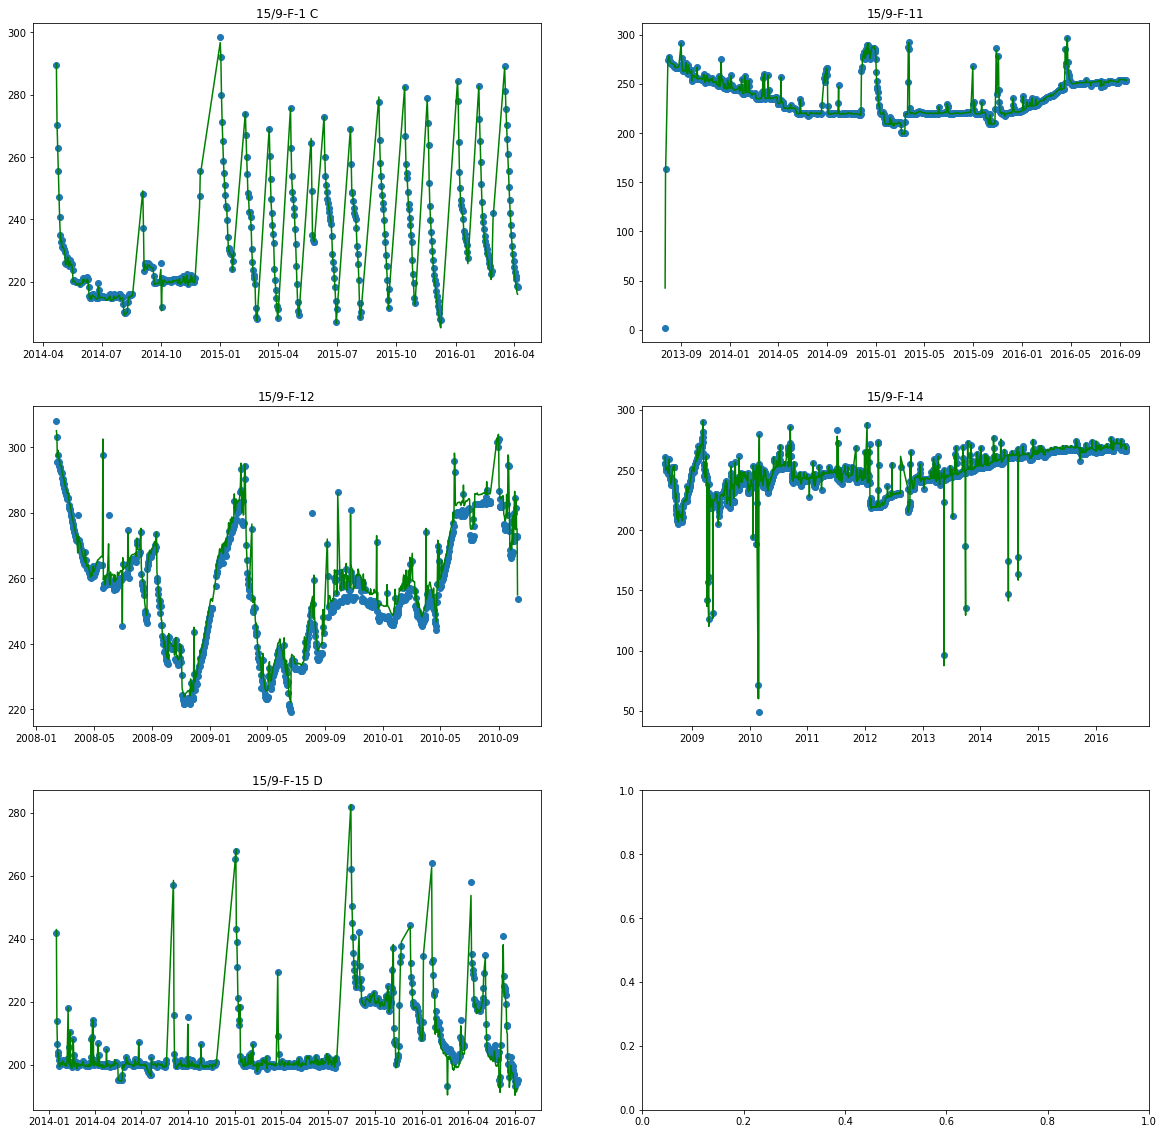

In [112]:
fig, ax = plt.subplots(3,2, figsize=(20,20))
row = [0, 0, 1, 1, 2]
col = [0, 1, 0, 1, 0]
df_prod2['bhp_lm'] = pipemodel.predict(df_prod2[predictors])
for i, well in enumerate(wellnames):
    dfpred = df_prod2[df_prod2['well_name']==well]
    #print(dfpred.shape)
    #plt.figure(figsize=(15,8))
    ax[row[i], col[i]].scatter(dfpred['dates'], dfpred['bhp'])
    ax[row[i], col[i]].set_title(well)
    ax[row[i], col[i]].plot(dfpred['dates'], dfpred['bhp_lm'], color='green')
    #plt.plot(dfpred['dates'], dfpred['bhp_Random_Forest'], color='green')
plt.show();

### Running Decision Trees and Random Forest

In [116]:
def genericml(model):
    pipemodel = Pipeline([
        ('scl', StandardScaler()),
        ('reg', model)
    ])
    pipemodel.fit(X_train, y_train)
    return pipemodel

def plotter(model, modelname):
    fig, ax = plt.subplots(3,2, figsize=(20,20))
    row = [0, 0, 1, 1, 2]
    col = [0, 1, 0, 1, 0]
    df_prod2[modelname] = model.predict(df_prod2[predictors])
    for i, well in enumerate(wellnames):
        dfpred = df_prod2[df_prod2['well_name']==well]
        #print(dfpred.shape)
        #plt.figure(figsize=(15,8))
        ax[row[i], col[i]].scatter(dfpred['dates'], dfpred['bhp'])
        ax[row[i], col[i]].set_title(well)
        ax[row[i], col[i]].plot(dfpred['dates'], dfpred[modelname], color='green')
        #plt.plot(dfpred['dates'], dfpred['bhp_Random_Forest'], color='green')
    plt.show();

c:\users\prime\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


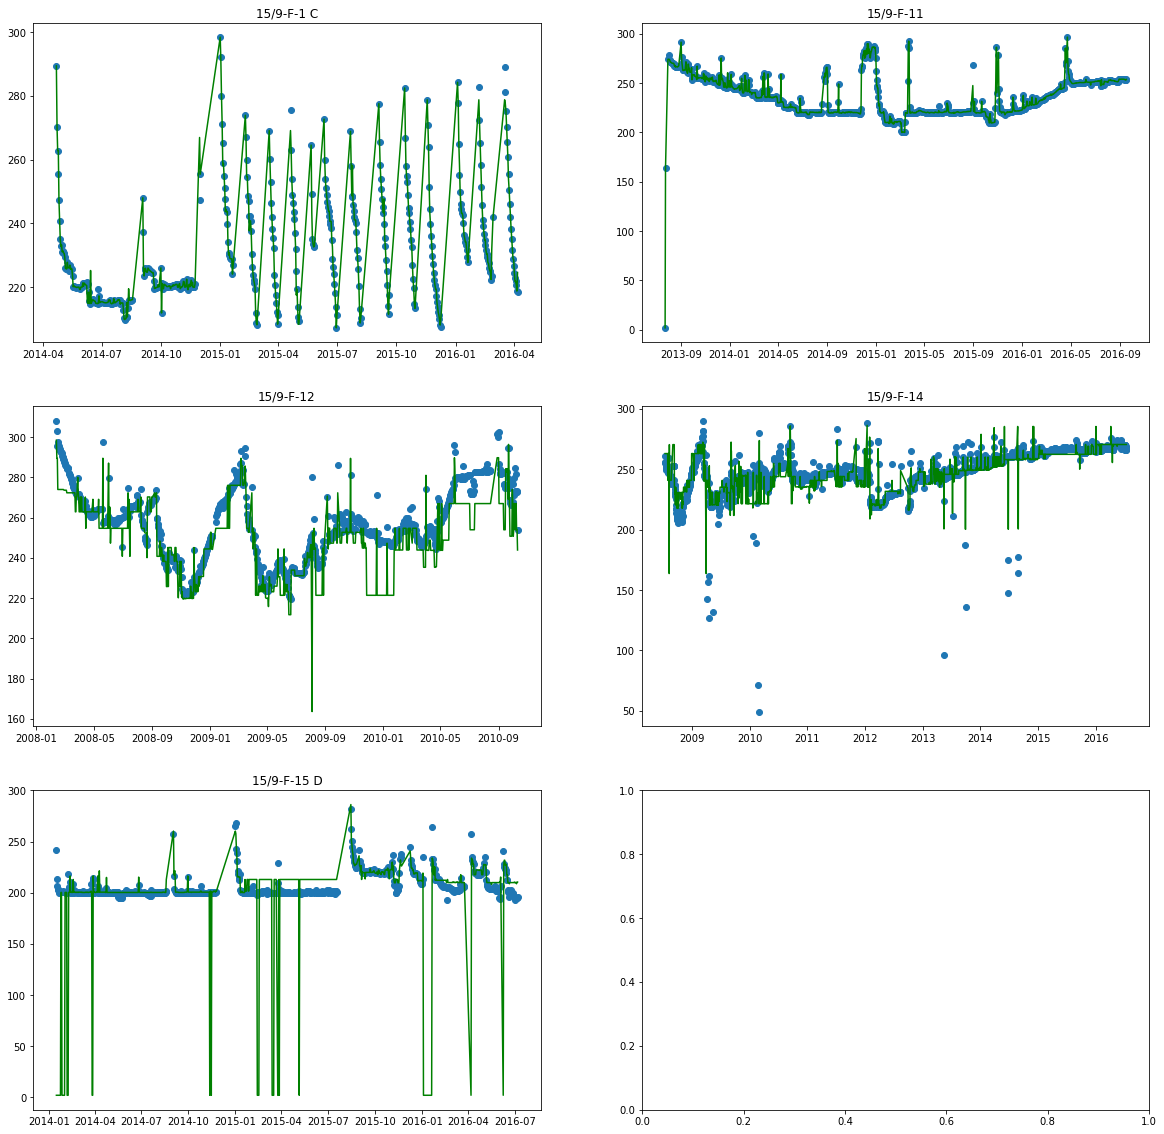

In [117]:
rf_reg = RandomForestRegressor()
#dtree_reg = DecisionTreeRegressor()

dtree_reg = genericml(DecisionTreeRegressor())
plotter(dtree_reg, "bhp_DT")

c:\users\prime\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\prime\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


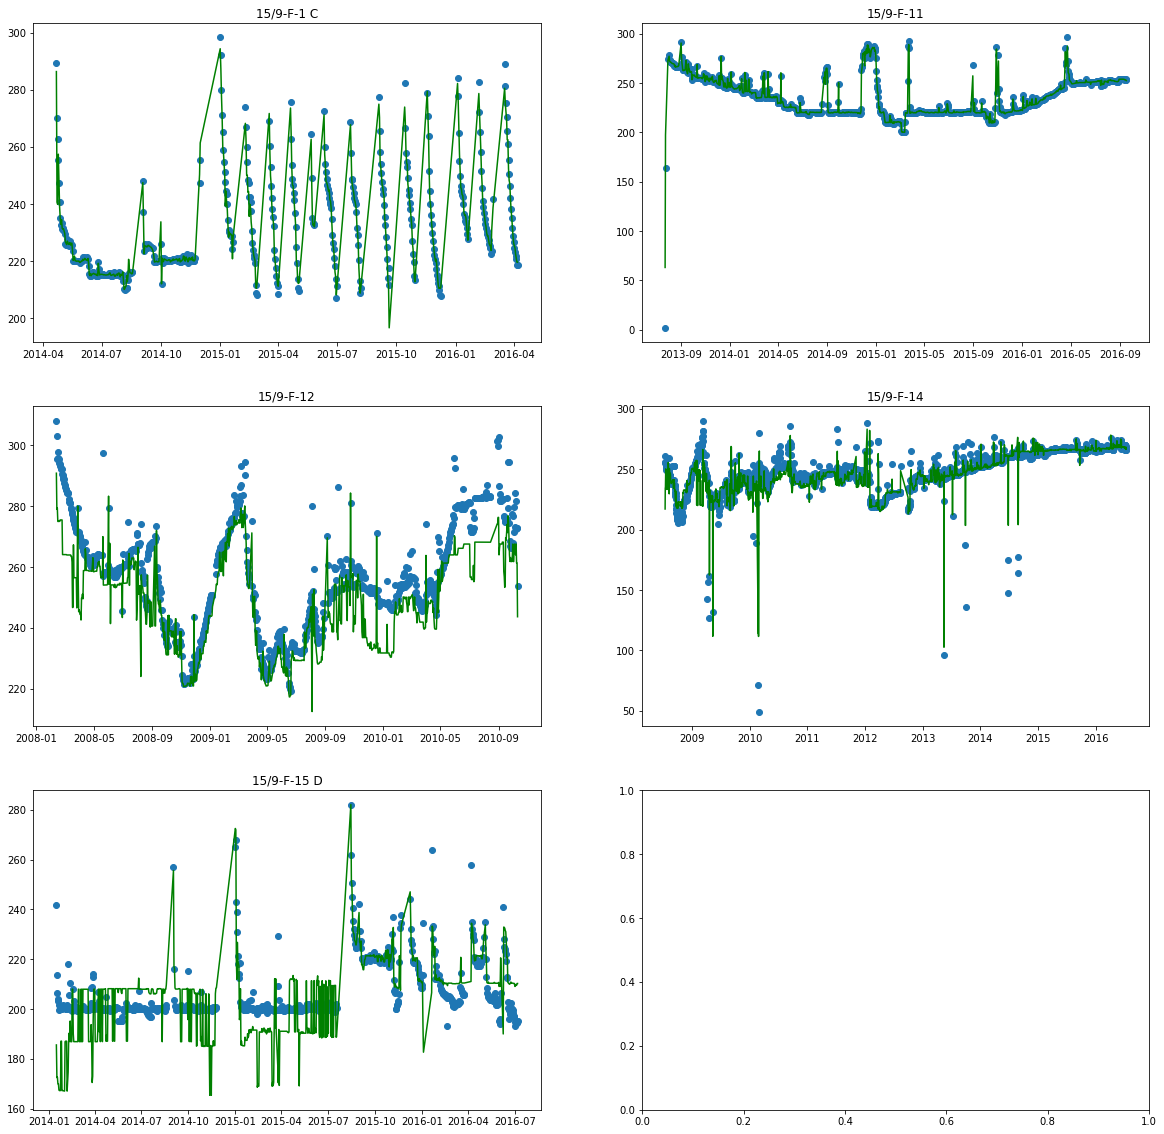

In [118]:
rf_reg = genericml(RandomForestRegressor())
plotter(rf_reg, "bhp_RF")

In [121]:
# running an ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import optimizers
model = Sequential()
model.add(Dense(32, input_shape = (len(predictors),), activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1))
sgd = optimizers.Adam(lr = 0.001)
model.compile(optimizer = sgd, loss = 'mse', metrics=['mae'])
model.fit(X_train, y_train.values, batch_size = 700, epochs = 500, verbose = 1)

Epoch 1/500
2/2 [==============================] - 0s 4ms/step - loss: 11256.8408 - mae: 86.6867
Epoch 2/500
2/2 [==============================] - 0s 5ms/step - loss: 10071.8662 - mae: 81.1661
Epoch 3/500
2/2 [==============================] - 0s 3ms/step - loss: 9349.5137 - mae: 79.2794
Epoch 4/500
2/2 [==============================] - 0s 2ms/step - loss: 8596.6465 - mae: 76.4778
Epoch 5/500
2/2 [==============================] - 0s 3ms/step - loss: 7781.3008 - mae: 72.5613
Epoch 6/500
2/2 [==============================] - 0s 3ms/step - loss: 6951.3613 - mae: 68.1845
Epoch 7/500
2/2 [==============================] - 0s 4ms/step - loss: 6181.8193 - mae: 63.9254
Epoch 8/500
2/2 [==============================] - 0s 3ms/step - loss: 5441.5176 - mae: 59.8104
Epoch 9/500
2/2 [==============================] - 0s 2ms/step - loss: 4772.5132 - mae: 55.9683
Epoch 10/500
2/2 [==============================] - 0s 5ms/step - loss: 4178.3159 - mae: 52.4821
Epoch 11/500
2/2 [===================

In [122]:
df_prod['bhp_ANN'] = model.predict(df_prod[predictors])
#plotter(model, "bhp_ANN")

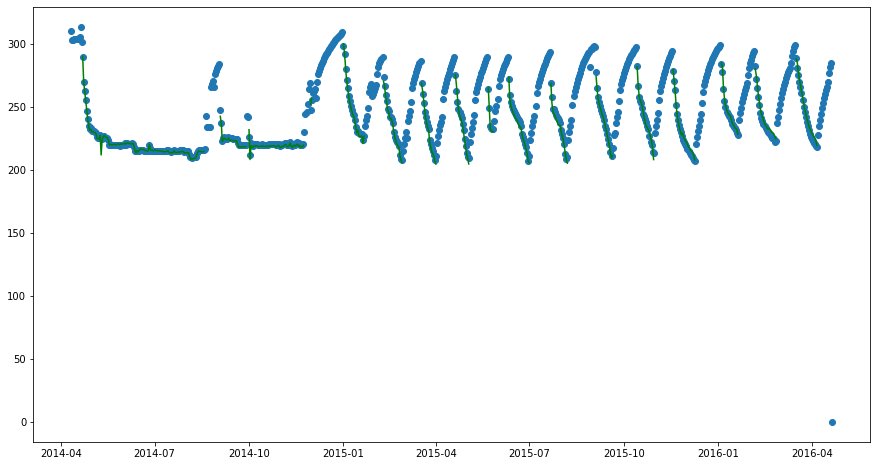

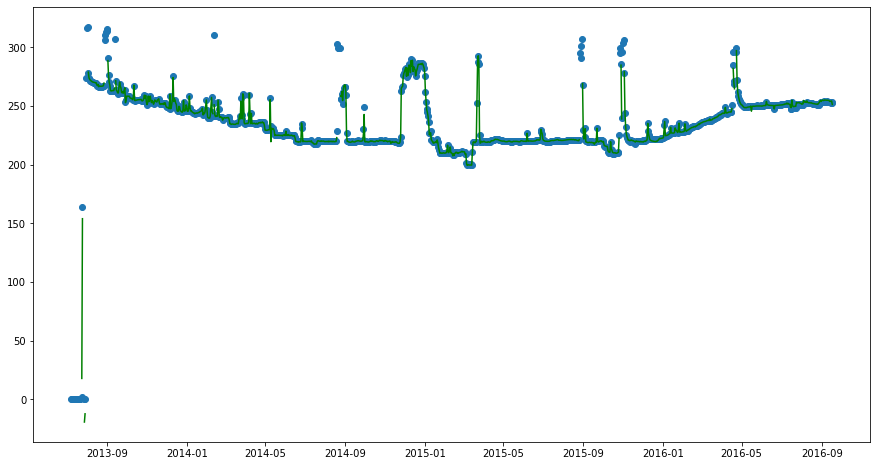

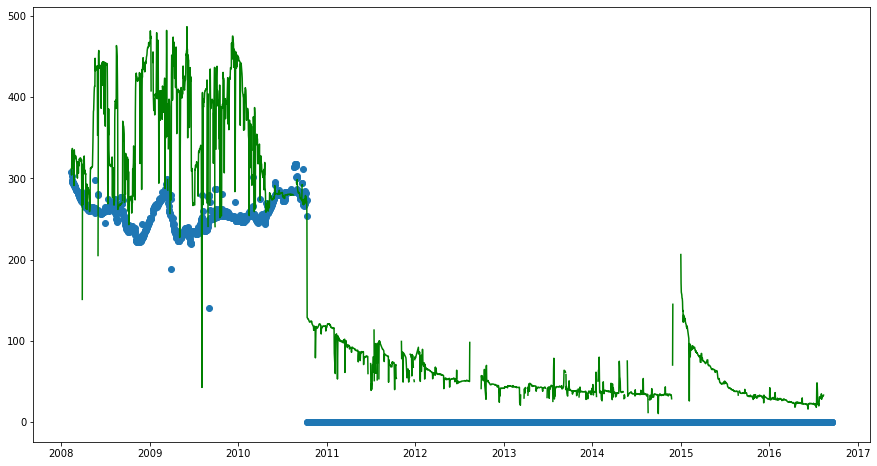

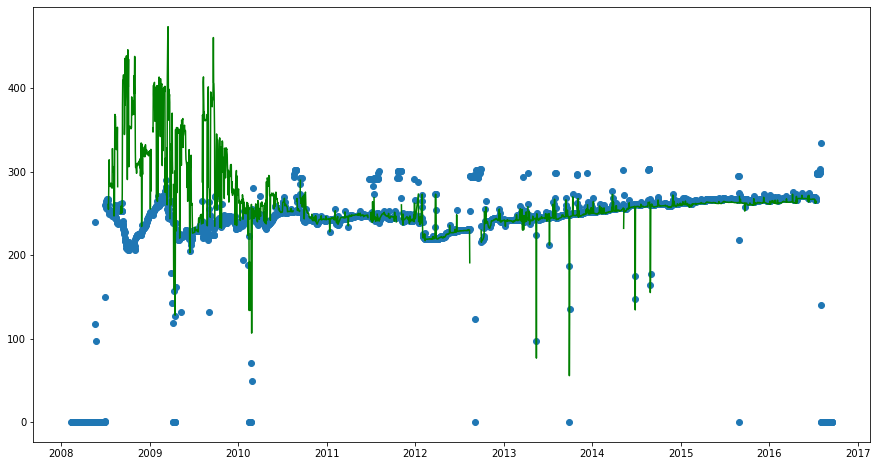

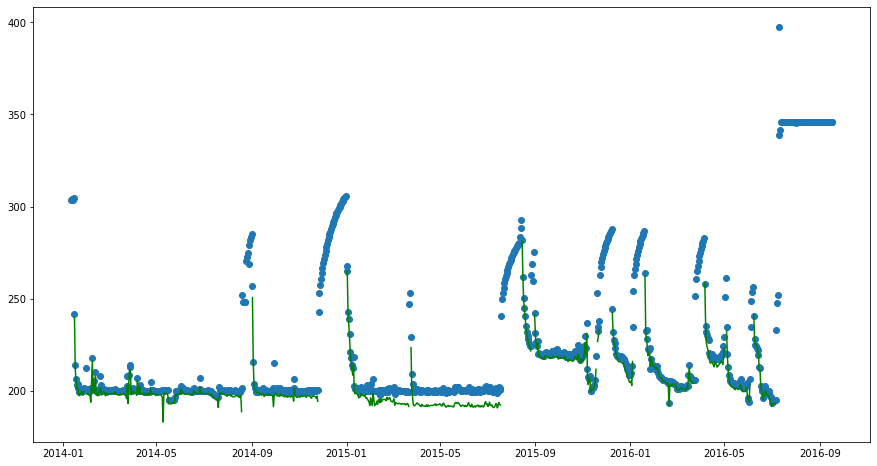

In [123]:
for well in wellnames:
    dfpred = df_prod[df_prod['well_name']==well]
    
    plt.figure(figsize=(15,8))
    plt.scatter(dfpred['dates'], dfpred['bhp'])
    plt.plot(dfpred['dates'], dfpred['bhp_ANN'], color='green')
    plt.show();